<a href="https://colab.research.google.com/github/karolinakuligowska/TMSMM_codes/blob/main/Class_12_Neural_Nets_RNN__R_example_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [32]:
# 1. Load dataset ----
df = pd.read_csv('movie_review.csv', encoding='utf-8')
print(df.head())

   fold_id cv_tag  html_id  sent_id  \
0        0  cv000    29590        0   
1        0  cv000    29590        1   
2        0  cv000    29590        2   
3        0  cv000    29590        3   
4        0  cv000    29590        4   

                                                text  tag  
0  films adapted from comic books have had plenty...  pos  
1  for starters , it was created by alan moore ( ...  pos  
2  to say moore and campbell thoroughly researche...  pos  
3  the book ( or " graphic novel , " if you will ...  pos  
4  in other words , don't dismiss this film becau...  pos  


In [33]:
# 2. Explore the data ----
print(df['tag'].value_counts())
print(df['text'][0])

tag
pos    32937
neg    31783
Name: count, dtype: int64
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .


In [34]:
# Split the dataset into training and testing
training, testing = train_test_split(df, test_size=0.2, random_state=123)

# Analyze word distribution in reviews:
# find out what is the distribution
# of the number of words in each review
word_counts = df['text'].apply(lambda x: len(x.split()))
print(word_counts.describe())

count    64720.000000
mean        23.063674
std         13.453944
min          1.000000
25%         14.000000
50%         21.000000
75%         30.000000
max        179.000000
Name: text, dtype: float64


In [35]:
# 3. Prepare the data ----

# the text — must be converted to tensors
# before fed into the neural network

num_words = 10000
max_length = 50

# Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=num_words,
    output_sequence_length=max_length
)


In [36]:
# Now, adapt the Text Vectorization layer.
# When we call adapt that the layer will learn
# about unique words in our dataset and assign an integer value for each one.

# Adapt the TextVectorization layer to the training data
text_vectorization.adapt(training['text'])

In [37]:
# The vocabulary is in our text vectorization layer
# see first 10 words
vocabulary = text_vectorization.get_vocabulary()
print(vocabulary[:10])

['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'that']


In [38]:
# See how the text vectorization layer transforms inputs
sample_text = training['text'].iloc[0]
print(f"Original: {sample_text}")
print(f"Transformed: {text_vectorization(tf.constant([sample_text])).numpy()}")

Original: i wouldn't be surprised if a couple of guys got together and created the opening credits , and then someone saw it and made up a story to go along with it .
Transformed: [[  19  705   23 1218   52    3  306    5  482  295  261    4  880    2
   443  690    4  103  351  510   10    4  136   48    3   67    6  129
   266   12   10    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]


In [39]:
# 4. Build the model ----

input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=16)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.5)(x)

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)

In [40]:
# 5. Hidden units ----

# This model has 16 neurons in a single hidden layer
# between the input and output:
# - input layer accepts a single string input.

# - Text Vectorization Layer processes text into numerical representations
# (not a hidden layer, just preprocessing)

# - Embedding Layer:maps words to dense vectors of size 16.
# (not considered a hidden layer, but a learnable representation)

# - Global Average Pooling Layer converts the sequence of word embeddings
# into a fixed-size vector by averaging across all word embeddings.
# (not a hidden layer but a dimensionality reduction step)

# - first fully connected (Dense) hidden layer:
# x = Dense(16, activation="relu")(x)
# (this is the first hidden layer with 16 units)

# - Dropout Layer is a regularization step
 # (not a hidden layer)

# - output layer
# output_layer = Dense(1, activation="sigmoid")(x)
# Is the final output layer with 1 unit (binary classification).

In [41]:
# 6. Loss function and optimizer ----

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [42]:
# 7. Train the model ----

# Train the model for 20 epochs in mini-batches of 512 samples.

history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20
81/81 - 35s - 426ms/step - accuracy: 0.5186 - loss: 0.6922 - val_accuracy: 0.5428 - val_loss: 0.6904
Epoch 2/20
81/81 - 1s - 13ms/step - accuracy: 0.5455 - loss: 0.6884 - val_accuracy: 0.5673 - val_loss: 0.6847
Epoch 3/20
81/81 - 1s - 15ms/step - accuracy: 0.5764 - loss: 0.6796 - val_accuracy: 0.5943 - val_loss: 0.6739
Epoch 4/20
81/81 - 1s - 16ms/step - accuracy: 0.6140 - loss: 0.6642 - val_accuracy: 0.6066 - val_loss: 0.6615
Epoch 5/20
81/81 - 1s - 16ms/step - accuracy: 0.6504 - loss: 0.6397 - val_accuracy: 0.6612 - val_loss: 0.6355
Epoch 6/20
81/81 - 2s - 25ms/step - accuracy: 0.6770 - loss: 0.6147 - val_accuracy: 0.6727 - val_loss: 0.6186
Epoch 7/20
81/81 - 2s - 20ms/step - accuracy: 0.6958 - loss: 0.5911 - val_accuracy: 0.6753 - val_loss: 0.6070
Epoch 8/20
81/81 - 1s - 13ms/step - accuracy: 0.7140 - loss: 0.5687 - val_accuracy: 0.6810 - val_loss: 0.5985
Epoch 9/20
81/81 - 1s - 14ms/step - accuracy: 0.7293 - loss: 0.5524 - val_accuracy: 0.6795 - val_loss: 0.5979
Epoch 10

In [43]:
# 8. Evaluate the model ----
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

# results
print(f"Test Loss: {results[0]:.2f}")

print(f"Test Accuracy: {results[1]:.2f}")


Test Loss: 0.62
Test Accuracy: 0.67


In [44]:
# This naive approach achieves an accuracy of about 67-68%.
# With more advanced approaches,
# the model should get closer to 85%.

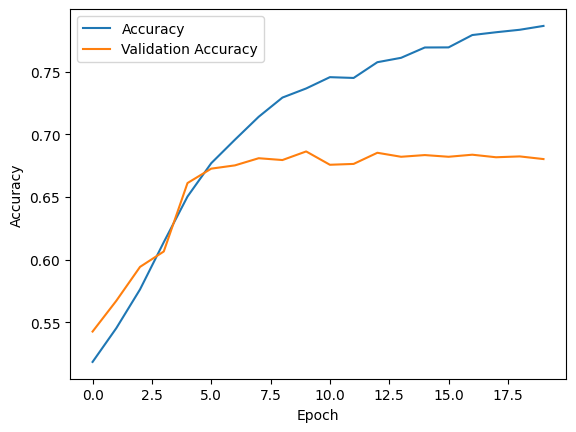

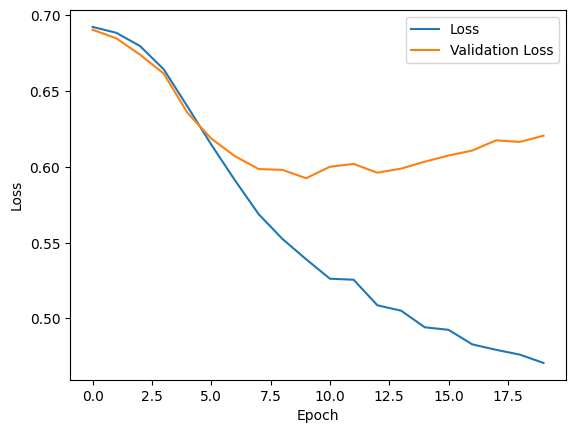

In [45]:
# Plot accuracy and loss over time (epochs)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
# 9. Now create your own review samples ----
# and check the model's sentiment output

In [47]:
# Define new reviews
new_reviews = [
    "it was awesome!",
    "I watched with pleasure",
    "the screening was a disaster I was ashamed of quality",
    "a misunderstanding, weak story",
    "rubbish stupid movie"
]


# Convert the list of strings to a TensorFlow tensor
new_reviews_tensor = tf.constant(new_reviews)

In [48]:
# Make predictions

predictions = model.predict(new_reviews_tensor) # Pass the tensor to model.predict



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


In [49]:
# Convert probabilities to sentiment labels (assuming binary classification)
predicted_labels = ["Positive" if p > 0.5 else "Negative" for p in predictions]

# Print results
for review, label, score in zip(new_reviews, predicted_labels, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {label} (Score: {score[0]:.4f})\n")

Review: it was awesome!
Predicted Sentiment: Positive (Score: 0.6409)

Review: I watched with pleasure
Predicted Sentiment: Positive (Score: 0.6303)

Review: the screening was a disaster I was ashamed of quality
Predicted Sentiment: Negative (Score: 0.2585)

Review: a misunderstanding, weak story
Predicted Sentiment: Negative (Score: 0.3105)

Review: rubbish stupid movie
Predicted Sentiment: Negative (Score: 0.1792)



In [50]:
# 10. Now test if chaged parameters
# for example doubled vocabulary and length:
# num_words = 20000
# max_length = 100
# applied on the same data set ----
# would improve the accuracy
# and the model's sentiment output on new_reviews

In [51]:
# Go through these steps:

# 3. Prepare the data ----

# the text — must be converted to tensors
# before fed into the neural network

num_words = 20000
max_length = 100


# Create the TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens=num_words,
    output_sequence_length=max_length
)


# Now, adapt the Text Vectorization layer.
# When we call adapt that the layer will learn
# about unique words in our dataset and assign an integer value for each one.

# Adapt the TextVectorization layer to the training data
text_vectorization.adapt(training['text'])


# 4. Build the model ----

input_layer = Input(shape=(1,), dtype="string")

x = text_vectorization(input_layer)
x = Embedding(input_dim=num_words + 1, output_dim=16)(x)
x = GlobalAveragePooling1D()(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.5)(x)

output_layer = Dense(1, activation="sigmoid")(x)

model = Model(input_layer, output_layer)


# 5. Hidden units ---- leave the same


# 6. Loss function and optimizer ----

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# 7. Train the model ----

# Train the model for 20 epochs in mini-batches of 512 samples.

history = model.fit(
    x=training['text'],
    y=(training['tag'] == "pos").astype(int),
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=2
)


# 8. Evaluate the model ----
results = model.evaluate(
    x=testing['text'],
    y=(testing['tag'] == "pos").astype(int),
    verbose=0
)

# results
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")


Epoch 1/20
81/81 - 3s - 36ms/step - accuracy: 0.5075 - loss: 0.6930 - val_accuracy: 0.5483 - val_loss: 0.6928
Epoch 2/20
81/81 - 3s - 38ms/step - accuracy: 0.5172 - loss: 0.6928 - val_accuracy: 0.5103 - val_loss: 0.6924
Epoch 3/20
81/81 - 2s - 22ms/step - accuracy: 0.5242 - loss: 0.6921 - val_accuracy: 0.5103 - val_loss: 0.6928
Epoch 4/20
81/81 - 1s - 15ms/step - accuracy: 0.5277 - loss: 0.6914 - val_accuracy: 0.5716 - val_loss: 0.6893
Epoch 5/20
81/81 - 1s - 16ms/step - accuracy: 0.5537 - loss: 0.6878 - val_accuracy: 0.5771 - val_loss: 0.6850
Epoch 6/20
81/81 - 1s - 15ms/step - accuracy: 0.5664 - loss: 0.6831 - val_accuracy: 0.5957 - val_loss: 0.6793
Epoch 7/20
81/81 - 1s - 15ms/step - accuracy: 0.5882 - loss: 0.6725 - val_accuracy: 0.6238 - val_loss: 0.6653
Epoch 8/20
81/81 - 1s - 15ms/step - accuracy: 0.6236 - loss: 0.6558 - val_accuracy: 0.6425 - val_loss: 0.6516
Epoch 9/20
81/81 - 1s - 14ms/step - accuracy: 0.6508 - loss: 0.6352 - val_accuracy: 0.6582 - val_loss: 0.6358
Epoch 10/2

In [52]:
# Accuracy improved by 0.01!
# Still naive approach

In [53]:
# Make predictions over new_reviews

predictions = model.predict(new_reviews_tensor) # Pass the tensor to model.predict

# Convert probabilities to sentiment labels (assuming binary classification)
predicted_labels = ["Positive" if p > 0.5 else "Negative" for p in predictions]

# Print results
for review, label, score in zip(new_reviews, predicted_labels, predictions):
    print(f"Review: {review}\nPredicted Sentiment: {label} (Score: {score[0]:.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Review: it was awesome!
Predicted Sentiment: Positive (Score: 0.6610)

Review: I watched with pleasure
Predicted Sentiment: Positive (Score: 0.6585)

Review: the screening was a disaster I was ashamed of quality
Predicted Sentiment: Negative (Score: 0.2579)

Review: a misunderstanding, weak story
Predicted Sentiment: Negative (Score: 0.4920)

Review: rubbish stupid movie
Predicted Sentiment: Negative (Score: 0.2079)

